Pruebas de Hipótesis

¿Ustedes creen que hay relación entre el consumo de helado y que el día sea soleado? ¿O es pura coincidencia?

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, chisquare
import seaborn as sns
import matplotlib.pyplot as plt

observaciones = pd.DataFrame({
    'clima': np.random.choice(['Soleado', 'Nublado'], size=1000, p=[0.6, 0.4]),
    'helado': np.random.choice(['Sí', 'No'], size=1000, p=[0.6, 0.4])
})

In [5]:
observaciones

,clima,helado
0,Nublado,Sí
1,Soleado,Sí
2,Nublado,Sí
3,Soleado,No
4,Nublado,No
...,...,...
995,Nublado,Sí
996,Nublado,Sí
997,Soleado,No
998,Soleado,Sí


In [6]:
# Supongamos que los días soleados tienen más consumo de helado
for i in observaciones.index:
    if observaciones.loc[i, 'clima'] == 'Nublado':
        observaciones.loc[i, 'helado'] = np.random.choice(['Sí', 'No'], p=[0.8, 0.2])
    else:
        observaciones.loc[i, 'helado'] = np.random.choice(['Sí', 'No'], p=[0.3, 0.7])

In [7]:
observaciones.value_counts()

clima    helado
Soleado  No        426
Nublado  Sí        336
Soleado  Sí        174
Nublado  No         64
Name: count, dtype: int64

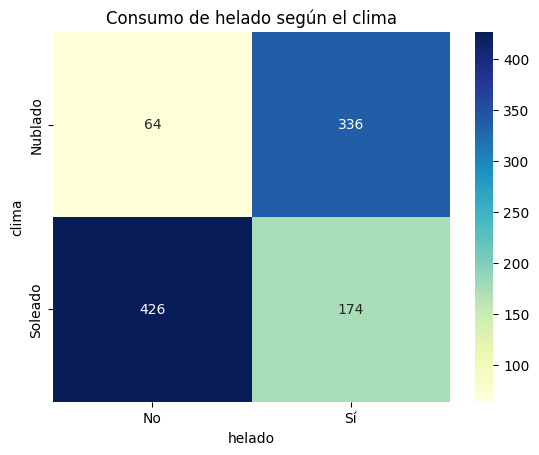

Estadístico Chi²: 288.3195
Valor p: 0.0000
➡ Hay evidencia estadística de que el consumo de helado está relacionado con el clima.


In [8]:
# Tabla de contingencia
tabla_helado = pd.crosstab(observaciones['clima'], observaciones['helado'])

# Visualización
sns.heatmap(tabla_helado, annot=True, cmap='YlGnBu', fmt=".4g")
plt.title('Consumo de helado según el clima')
plt.show()

# Prueba Chi² de independencia
chi2, p, dof, expected = chi2_contingency(tabla_helado)
print(f"Estadístico Chi²: {chi2:.4f}")
print(f"Valor p: {p:.4f}")

if p < 0.05:
    print("➡ Hay evidencia estadística de que el consumo de helado está relacionado con el clima.")
else:
    print("➡ No hay evidencia suficiente para afirmar que el consumo de helado depende del clima.")

¿Qué es una prueba de hipótesis?

Una prueba de hipótesis es un procedimiento estadístico para tomar decisiones basadas en datos. Nos permite validar si una afirmación sobre una población es razonable a partir de una muestra.

Elementos clave:

- Hipótesis nula (H0): Suposición inicial (ej: no hay relación entre variables)

- Hipótesis alternativa (H1): Lo que queremos comprobar (ej: sí hay relación)

- Valor p (p-value): Probabilidad de observar un resultado igual o más extremo si H0 es cierta

- Nivel de significancia (α): Umbral comúnmente usado es 0.05

Reglas básicas:

- Si p < α → Rechazamos H0 (hay evidencia a favor de H1)

- Si p >= α → No se puede rechazar H0

Ejemplo 1: Chi² de independencia

En un conjunto simulado de encuestas se quiere analizar si existe relación entre el género y la calificación de satisfacción del cliente sobre un producto

In [9]:
# Simulamos datos de encuesta
np.random.seed(42)
encuesta = pd.DataFrame({
    'genero': np.random.choice(['M', 'F'], size=100),
    'calificacion_satisfaccion': np.random.choice(['Baja', 'Media', 'Alta'], size=100, p=[0.3, 0.4, 0.3])
})

In [10]:
encuesta

,genero,calificacion_satisfaccion
0,M,Alta
1,F,Alta
2,M,Alta
3,M,Alta
4,M,Media
...,...,...
95,F,Baja
96,F,Media
97,F,Media
98,F,Baja


In [11]:
# Agregamos dependencia artificial: las mujeres tienden a reportar más satisfacción alta
for i in encuesta.index:
    if encuesta.loc[i, 'genero'] == 'F':
        encuesta.loc[i, 'calificacion_satisfaccion'] = np.random.choice(['Baja', 'Media', 'Alta'], p=[0.2, 0.3, 0.5])
    else:
        encuesta.loc[i, 'calificacion_satisfaccion'] = np.random.choice(['Baja', 'Media', 'Alta'], p=[0.4, 0.4, 0.2])

In [12]:
encuesta.value_counts()

genero  calificacion_satisfaccion
F       Alta                         29
M       Media                        21
F       Media                        17
M       Baja                         16
F       Baja                         10
M       Alta                          7
Name: count, dtype: int64

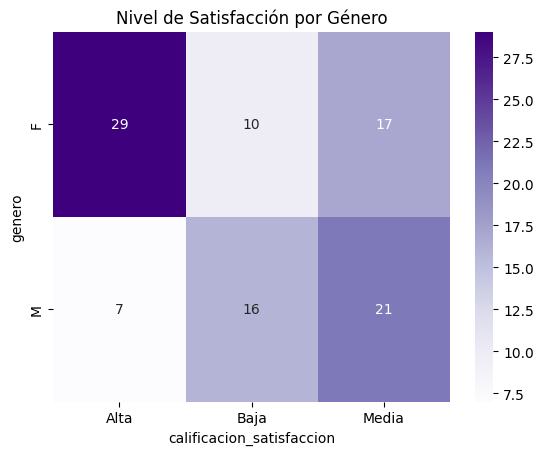

In [13]:
# Tabla de contingencia
contingencia = pd.crosstab(encuesta['genero'], encuesta['calificacion_satisfaccion'])

# Visualización
sns.heatmap(contingencia, annot=True, cmap='Purples')
plt.title('Nivel de Satisfacción por Género')
plt.show()

In [14]:
# Prueba Chi²
chi2, p, dof, expected = chi2_contingency(contingencia)
print(f"Estadístico Chi²: {chi2:.4f}")
print(f"Valor p: {p:.4f}")

if p < 0.05:
    print("➡ Existe relación entre género y nivel de satisfacción.")
else:
    print("➡ No hay evidencia suficiente de relación entre género y satisfacción.")

Estadístico Chi²: 14.0119
Valor p: 0.0009
➡ Existe relación entre género y nivel de satisfacción.


Ejemplo 2: Chi² de bondad de ajuste (también conocido como Chi² tipo 3)

Sobre el mismo conjunto de datos, analizar la distribución de niveles de satisfacción

100 -- 20 de cada tipo de producto

- Tipo 1 0

- Tipo 2 2

- Tipo 3 6

- Tipo 4 2

- Tipo 5 10

In [15]:
observado = encuesta['calificacion_satisfaccion'].value_counts().sort_index()
esperado = [len(encuesta)/3]*3  # Esperamos distribución pareja

test = chisquare(f_obs=observado, f_exp=esperado)
print("--- Prueba de bondad de ajuste (Chi² tipo 3) ---")
print(f"Chi²: {test.statistic:.4f}")
print(f"Valor p: {test.pvalue:.4f}")

if test.pvalue < 0.05:
    print("➡ La distribución observada de satisfacción difiere de lo esperado.")
else:
    print("➡ No hay diferencia significativa en la distribución de satisfacción.")

--- Prueba de bondad de ajuste (Chi² tipo 3) ---
Chi²: 2.4800
Valor p: 0.2894
➡ No hay diferencia significativa en la distribución de satisfacción.


¿Por qué esto importa en Machine Learning?

- Detectar relaciones entre variables antes de modelar

- Evitar usar variables irrelevantes

- Realizar selección inicial de variables categóricas

- Explorar datos y validar supuestos antes de entrenar modelos

Comparación: Chi² vs Correlación

Ambas técnicas buscan relaciones entre variables, pero son diferentes en sus aplicaciones:

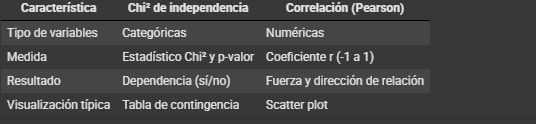

Elegir la prueba adecuada:

- Variables categóricas → Chi²

- Variables numéricas → Correlación